# Digit Recognition with Convolutional Neural Networks

The [MNIST dataset](http://yann.lecun.com/exdb/mnist/), officially known as "The MNIST Database of Handwritten Digits," is a famous dataset used to train machine-learning models (and neural networks) to recognize handwritten digits. Each digit in the dataset consists of a 28x28 array of numbers representing pixel values from 0 to 255. In this example, we will use Keras to build and train a convolutional neural network (CNN) on the MNIST dataset. The dataset is included in Keras as a sample dataset, so we'll begin by loading it and examining its content and structure.

![](Images/mnist.png)

In [3]:
from keras.datasets import mnist

(train_images, y_train), (test_images, y_test) = mnist.load_data()
print(f'train_images: {train_images.shape}')
print(f'y_train: {y_train.shape}')
print(f'test_images: {test_images.shape}')
print(f'y_test: {y_test.shape}')

train_images: (60000, 28, 28)
y_train: (60000,)
test_images: (10000, 28, 28)
y_test: (10000,)


Plot the first 50 images and show the corresponding labels.

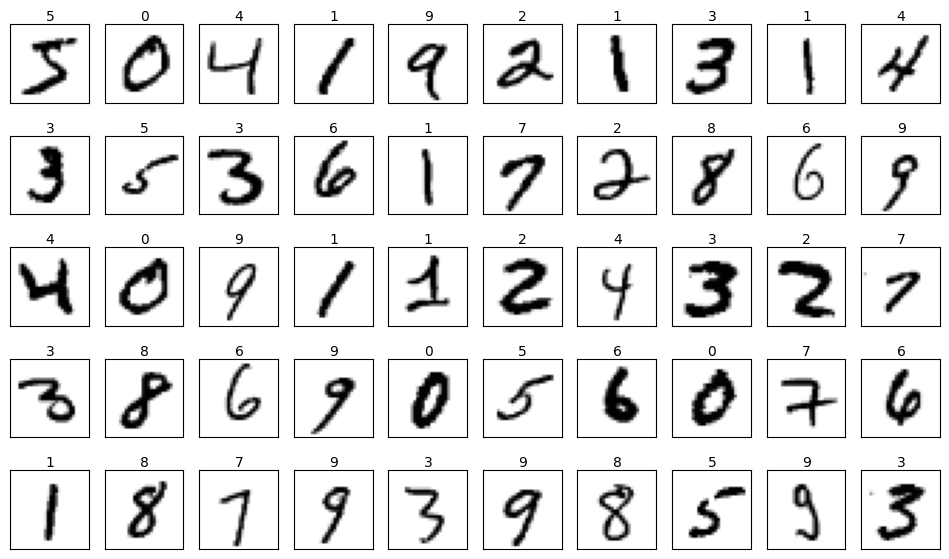

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)

print first of test images


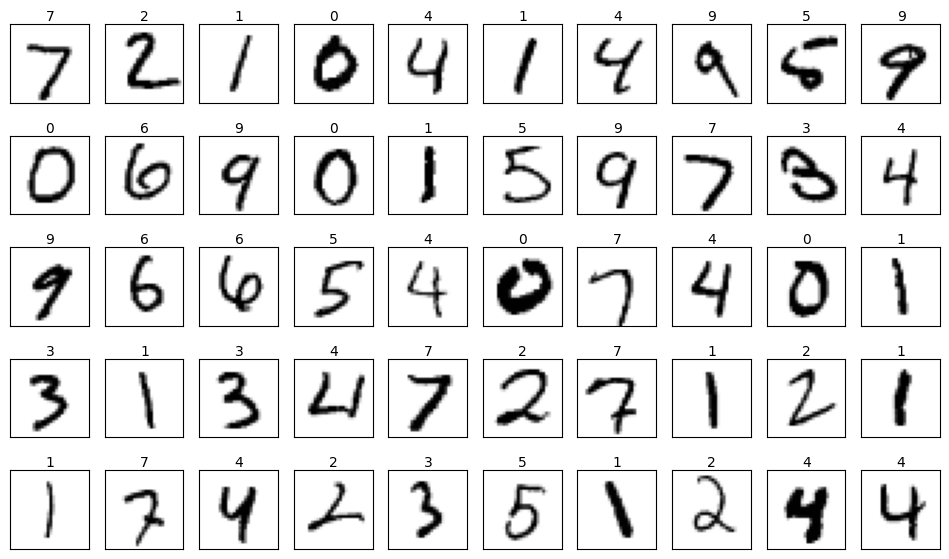

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap=plt.cm.gray_r)
    ax.text(0.45, 1.05, str(y_test[i]), transform=ax.transAxes)

Reshape the image data for input to a CNN and normalize the pixel values by dividing them by 255.

In [5]:
x_train = train_images.reshape(60000, 28, 28, 1) / 255
x_test = test_images.reshape(10000, 28, 28, 1) / 255

Create a convolutional neural network with a `softmax` output layer for classification.

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary(line_length=80)

/Users/gavena/Desktop/workspace/genaibootcamp/new_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-25 14:48:37.159885: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-04-25 14:48:37.159925: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-04-25 14:48:37.159934: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-04-25 14:48:37.159978: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-25 14:48:37.159991: I tensorflow/core/common_runtime/pluggable_de

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                      ┃ Output Shape             ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                   │ (None, 26, 26, 32)       │           320 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)      │ (None, 13, 13, 32)       │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)                 │ (None, 11, 11, 64)       │        18,496 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)    │ (None, 5, 5, 64)         │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ flatten (Flatten)                 │ (None, 1600)             │             0 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense (Dense)                     │ (None, 128)              │       204,928 │
├───────────────────────────────────┼──────────────────────────┼───────────────┤
│ dense_1 (Dense)                   │ (None, 10)               │         1,290 │
└───────────────────────────────────┴──────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Call `fit` to train the model.

In [7]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=50)

Epoch 1/10


2025-04-25 14:48:46.978022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1200/1200 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8975 - loss: 0.3405 - val_accuracy: 0.9840 - val_loss: 0.0480
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9829 - loss: 0.0579 - val_accuracy: 0.9839 - val_loss: 0.0547
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9866 - loss: 0.0468 - val_accuracy: 0.9870 - val_loss: 0.0402
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9878 - loss: 0.0436 - val_accuracy: 0.9856 - val_loss: 0.0590
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9871 - loss: 0.0570 - val_accuracy: 0.9822 - val_loss: 0.1320
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9858 - loss: 0.1109 - val_accuracy: 0.9839 - val_loss: 0.1537
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9866 - loss: 0.1498 - val_accuracy: 0.9816 - val_loss: 0.2895
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9856 - loss: 0.2566 - val

Plot the training and validation accuracy.

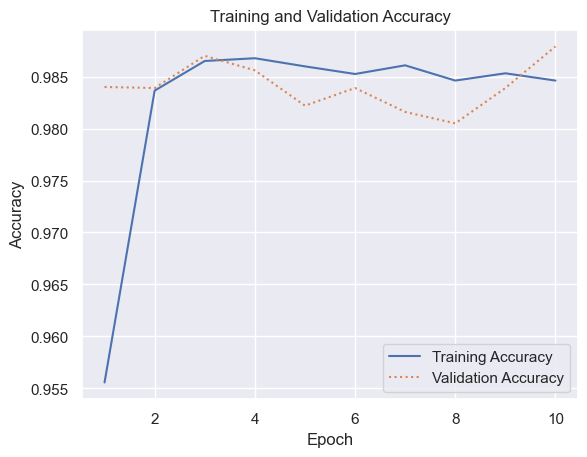

In [8]:
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

How accurate is the model?

In [9]:
scores = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]:.1%}')

Accuracy: 98.8%


Show one of the test images.

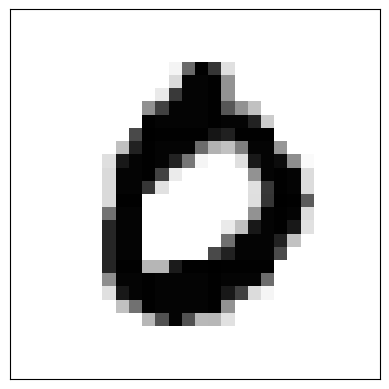

In [18]:
sns.reset_orig()
test_image = test_images[3]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(test_image, cmap=plt.cm.gray_r)

Use the test image to make a prediction.

In [19]:
x = test_image.reshape(1, 28, 28, 1) / 255
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

Get the predicted class.

In [20]:
import numpy as np

predicted_class = np.argmax(model.predict(x), axis=1)[0]
print('Looks like a ' + str(predicted_class) + '!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Looks like a 0!


# Model Performance and Saving

Our convolutional neural network has achieved excellent performance on the MNIST digit recognition task, with approximately 98.8% accuracy on the test set. The model successfully identifies handwritten digits, as demonstrated by our example predictions.

Neural network training can be computationally expensive, taking significant time and resources. Once we've trained a successful model, it's good practice to save it so we can:

- Use it later without having to retrain
- Deploy it in applications
- Share it with others
- Compare it with future models

In the next cell, we'll save our trained model to disk using Keras's built-in save functionality, allowing us to reload it later for inference without retraining.

In [21]:
# Save the trained model
model.save('image_model.h5')
print("Model saved as 'image_model.h5'")

Model saved as 'image_model.h5'


# Testing the Saved Model

Now that we have trained and saved our CNN model for digit recognition, we can demonstrate how to load and use it for making predictions. This is a common workflow in machine learning applications where models are trained once and then deployed for inference.

In the next cell, we will:
1. Load the saved model from disk
2. Select a random image from our test set
3. Display the image with its actual label
4. Make a prediction using our model
5. Show the predicted digit and the model's confidence in its prediction

This demonstrates how the trained model can be used in a real-world application to recognize handwritten digits.

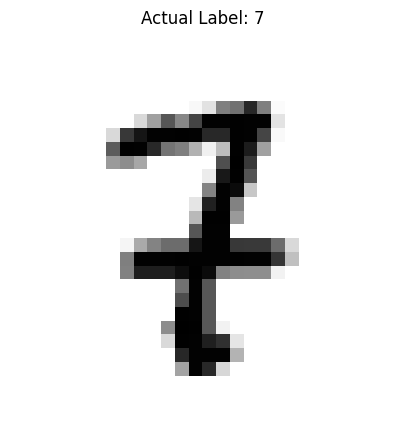

Prediction: 7
Confidence: 100.00%
Correct: True


In [25]:
from tensorflow.keras.models import load_model
import numpy as np
import random

# Load the saved model
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = load_model('image_model.h5')

# Choose a random image from test set
sample_idx = random.randint(0, len(test_images) - 1)
sample_image = test_images[sample_idx]
actual_label = y_test[sample_idx]

# Display the image
plt.figure(figsize=(5, 5))
plt.imshow(sample_image, cmap=plt.cm.gray_r)
plt.title(f'Actual Label: {actual_label}')
plt.axis('off')
plt.show()

# Prepare image for prediction
sample_x = sample_image.reshape(1, 28, 28, 1) / 255

# Make prediction
prediction = loaded_model.predict(sample_x, verbose=0)
predicted_label = np.argmax(prediction)
confidence = np.max(prediction) * 100

print(f'Prediction: {predicted_label}')
print(f'Confidence: {confidence:.2f}%')
print(f'Correct: {predicted_label == actual_label}')